<a href="https://colab.research.google.com/github/pragneshrana/DeepLearning/blob/master/PrimitiveNeurons/PerceptronCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron model from scratch

In [2]:
#Importing Data
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split as tst
breast_cancer = sklearn.datasets.load_breast_cancer()
X = breast_cancer.data
Y = breast_cancer.target
X_train, X_test, Y_train, Y_test = tst(X,Y,test_size=0.1,stratify=Y,random_state =1)

# Perpectron Class:
 y =1 if $\sum_i w_i x_i \ge b$ \\
 y = 0 otherwise

In [3]:
class Perceptron:
    '''
    This is perceptron class.
    Useful for data which are linearly seperable.
    '''

    def __init__(self):
      self.w = None #weights 
      self.b = None #thresold
    
    def model(self,x):
      '''
      Given X compute Y
      '''
      if(np.dot(self.w , x) >= self.b):
        return 1
      else:
        return 0

    
    def predict(self,X):
      '''
      This will work as vector for prediction
      '''
      y_pred = [] #
      for x in X:
        y = self.model(x)
        y_pred.append(y)
      return np.array(y_pred)
    
    def fit(self,X,Y):
      '''
      Given values of X and Y.
      This will learn the parametes.
      '''
      self.w = np.ones(X.shape[1])
      self.b = 0
      for x,y in zip(X,Y):
        y_pred = self.model(x)
        if(y ==1 and y_pred == 0):
          self.w = self.w + x
          self.b = self.b + 1
        if(y ==0 and y_pred == 1):
          self.w = self.w - x
          self.b = self.b - 1




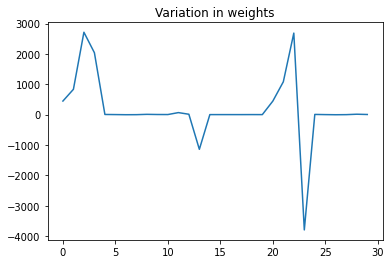

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
perceptron = Perceptron()
perceptron.fit(X_train,Y_train)
plt.plot(perceptron.w)
plt.title('Variation in weights')
plt.show()

In [5]:
y_pred_train = perceptron.predict(X_train)
print('Training Accuracy: ', accuracy_score(y_pred_train,Y_train))

y_pred_test = perceptron.predict(X_test)
print('Testing Accuracy: ',accuracy_score(y_pred_test,Y_test))


Training Accuracy:  0.373046875
Testing Accuracy:  0.3684210526315789


The accuracy is very poor and as per our expectation.
So what wrong?

- In above code we are iterting one time over all the data. 
    - we take data point
    - Predict result
    - Adjust weight 
    - Move on next data point
    - so, we just passing one time and we don't know after final weight are compatible with first data point or not.
- Rather than more than we have to cover or loop over all the data points multiple time. Iteration over all the data point is called **'Epoch'**.

- 'Epoch' also affect the accuracy of the model but it is not directly associated with model like w and b so, it is called as **hyper-parameter**.

In [25]:
class Perceptron:
    '''
    This is perceptron class.
    Useful for data which are linearly seperable.
    '''

    def __init__(self):
      self.w = None #weights 
      self.b = None #thresold
    
    def model(self,x):
      '''
      Given X compute Y
      '''
      if(np.dot(self.w , x) >= self.b):
        return 1
      else:
        return 0

    
    def predict(self,X):
      '''
      This will work as vector for prediction
      '''
      y_pred = [] #
      for x in X:
        y = self.model(x)
        y_pred.append(y)
      return np.array(y_pred)
    
    def fit(self,X,Y,epoch=1):
      '''
      Given values of X and Y.
      This will learn the parametes.
      '''
      self.w = np.ones(X.shape[1])
      self.b = 0
      accuracy = [] #dictionary
      for i in range(epoch):
        for x,y in zip(X,Y):
          y_pred = self.model(x)
          if(y ==1 and y_pred == 0):
            self.w = self.w + x
            self.b = self.b + 1
          if(y ==0 and y_pred == 1):
            self.w = self.w - x
            self.b = self.b - 1
        accuracy.append(accuracy_score(self.predict(X),Y))
      print('Maximum Accuracy :', max(accuracy))
      plt.plot(accuracy)
      plt.title('Variation in accuracy')
      plt.show()




Maximum Accuracy : 0.921875


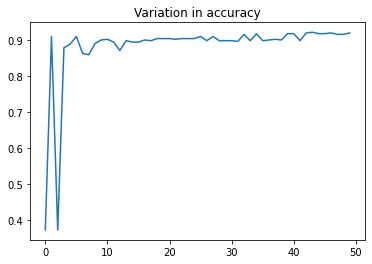

Training Accuracy:  0.919921875
Testing Accuracy:  0.9298245614035088


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
perceptron = Perceptron()
perceptron.fit(X_train,Y_train,50)

#for last model
y_pred_train = perceptron.predict(X_train)
print('Training Accuracy: ', accuracy_score(y_pred_train,Y_train))

y_pred_test = perceptron.predict(X_test)
print('Testing Accuracy: ',accuracy_score(y_pred_test,Y_test))


# CheckPointing

We will keep track of model with maximum accuracy. \
Weight with maximum accuracy will be overwritten if less accuracy is encountered.

In [34]:
class Perceptron:
    '''
    This is perceptron class.
    Useful for data which are linearly seperable.
    '''

    def __init__(self):
      self.w = None #weights 
      self.b = None #thresold
    
    def model(self,x):
      '''
      Given X compute Y
      '''
      if(np.dot(self.w , x) >= self.b):
        return 1
      else:
        return 0

    
    def predict(self,X):
      '''
      This will work as vector for prediction
      '''
      y_pred = [] #
      for x in X:
        y = self.model(x)
        y_pred.append(y)
      return np.array(y_pred)
    
    def fit(self,X,Y,epoch=1):
      '''
      Given values of X and Y.
      This will learn the parametes.
      '''
      self.w = np.ones(X.shape[1])
      self.b = 0
      accuracy = [] #dictionary
      for i in range(epoch):
        for x,y in zip(X,Y):
          y_pred = self.model(x)
          if(y ==1 and y_pred == 0):
            self.w = self.w + x
            self.b = self.b + 1
          if(y ==0 and y_pred == 1):
            self.w = self.w - x
            self.b = self.b - 1
        
        accuracy.append(accuracy_score(self.predict(X),Y))

        if(accuracy_score(self.predict(X),Y) >= max(accuracy)):
          chkpnt_w = self.w
          chkpnt_b = self.b
      
      #Restoring the parameters associated with maximum accuracy
      self.w = chkpnt_w
      self.b = chkpnt_b
        
      print('Maximum Accuracy :', max(accuracy))
      plt.plot(accuracy)
      plt.title('Variation in accuracy')
      plt.show()

Maximum Accuracy : 0.921875


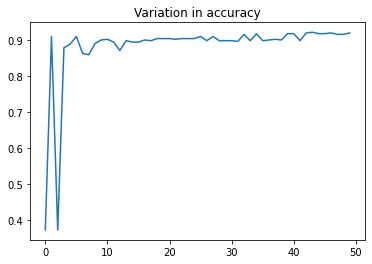

Training Accuracy:  0.921875
Testing Accuracy:  0.9298245614035088


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
perceptron = Perceptron()
perceptron.fit(X_train,Y_train,50)

#for last model
y_pred_train = perceptron.predict(X_train)
print('Training Accuracy: ', accuracy_score(y_pred_train,Y_train))

y_pred_test = perceptron.predict(X_test)
print('Testing Accuracy: ',accuracy_score(y_pred_test,Y_test))

Observe that maximum accuracy is same as training accuracy.

# Learning Rate :

So far weight are changed by $w = w \pm x$ but changed weight abruptly may affectt the result and need more iterations. So, there to reduce the change in weights some factor $(<1)$ can be multiplied. so, change weights will be $w = w \pm \eta \cdot x$. where, $\eta$ is called as **learning rate**.

In [40]:
class Perceptron:
    '''
    This is perceptron class.
    Useful for data which are linearly seperable.
    '''

    def __init__(self):
      self.w = None #weights 
      self.b = None #thresold
    
    def model(self,x):
      '''
      Given X compute Y
      '''
      if(np.dot(self.w , x) >= self.b):
        return 1
      else:
        return 0

    
    def predict(self,X):
      '''
      This will work as vector for prediction
      '''
      y_pred = [] #
      for x in X:
        y = self.model(x)
        y_pred.append(y)
      return np.array(y_pred)
    
    def fit(self,X,Y,epoch=1,lr=1):
      '''
      Given values of X and Y.
      This will learn the parametes.
      '''
      self.w = np.ones(X.shape[1])
      self.b = 0
      accuracy = [] #dictionary
      for i in range(epoch):
        for x,y in zip(X,Y):
          y_pred = self.model(x)
          if(y ==1 and y_pred == 0):
            self.w = self.w + lr * x
            self.b = self.b + lr * 1
          if(y ==0 and y_pred == 1):
            self.w = self.w - lr * x
            self.b = self.b - lr * 1
        
        accuracy.append(accuracy_score(self.predict(X),Y))

        if(accuracy_score(self.predict(X),Y) >= max(accuracy)):
          chkpnt_w = self.w
          chkpnt_b = self.b
      
      #Restoring the parameters associated with maximum accuracy
      self.w = chkpnt_w
      self.b = chkpnt_b
        
      print('Maximum Accuracy :', max(accuracy))
      plt.plot(accuracy)
      plt.title('Variation in accuracy')
      plt.ylim((0,1))
      plt.show()

# $\eta = 1 , Iteration = 50$

Maximum Accuracy : 0.921875


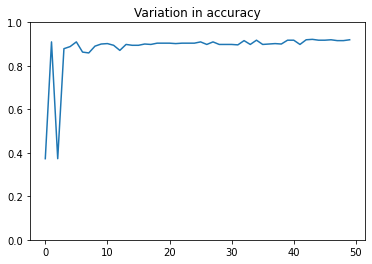

Training Accuracy:  0.921875
Testing Accuracy:  0.9298245614035088


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
perceptron = Perceptron()
perceptron.fit(X_train,Y_train,50)

#for last model
y_pred_train = perceptron.predict(X_train)
print('Training Accuracy: ', accuracy_score(y_pred_train,Y_train))

y_pred_test = perceptron.predict(X_test)
print('Testing Accuracy: ',accuracy_score(y_pred_test,Y_test))

# $\eta = 0.1 , Iteration = 50$

Maximum Accuracy : 0.923828125


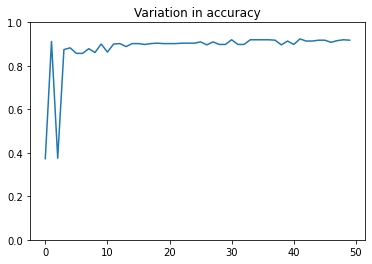

Training Accuracy:  0.923828125
Testing Accuracy:  0.9473684210526315


In [42]:
perceptron.fit(X_train,Y_train,50,0.1)

#for last model
y_pred_train = perceptron.predict(X_train)
print('Training Accuracy: ', accuracy_score(y_pred_train,Y_train))

y_pred_test = perceptron.predict(X_test)
print('Testing Accuracy: ',accuracy_score(y_pred_test,Y_test))

# $\eta = 0.0001 , Iteration = 50$

Maximum Accuracy : 0.91796875


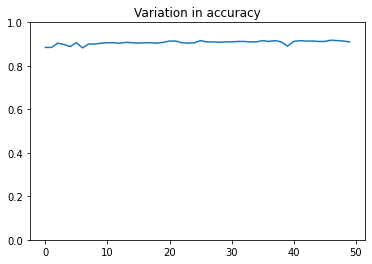

Training Accuracy:  0.91796875
Testing Accuracy:  0.9473684210526315


In [45]:
perceptron.fit(X_train,Y_train,50,0.0001)

#for last model
y_pred_train = perceptron.predict(X_train)
print('Training Accuracy: ', accuracy_score(y_pred_train,Y_train))

y_pred_test = perceptron.predict(X_test)
print('Testing Accuracy: ',accuracy_score(y_pred_test,Y_test))

# $\eta = 0.0001 , Iteration = 5000$

Maximum Accuracy : 0.94140625


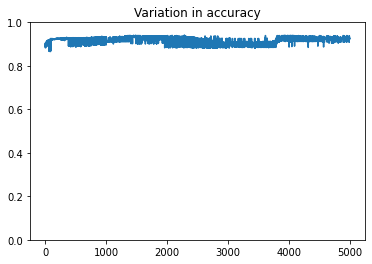

Training Accuracy:  0.94140625
Testing Accuracy:  0.9473684210526315


In [46]:
perceptron.fit(X_train,Y_train,5000,0.0001)

#for last model
y_pred_train = perceptron.predict(X_train)
print('Training Accuracy: ', accuracy_score(y_pred_train,Y_train))

y_pred_test = perceptron.predict(X_test)
print('Testing Accuracy: ',accuracy_score(y_pred_test,Y_test))

## Animate weight changes

Source : http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/

In [95]:
class Perceptron:
    '''
    This is perceptron class.
    Useful for data which are linearly seperable.
    '''

    def __init__(self):
      self.w = None #weights 
      self.b = None #thresold
    
    def model(self,x):
      '''
      Given X compute Y
      '''
      if(np.dot(self.w , x) >= self.b):
        return 1
      else:
        return 0

    
    def predict(self,X):
      '''
      This will work as vector for prediction
      '''
      y_pred = [] #
      for x in X:
        y = self.model(x)
        y_pred.append(y)
      return np.array(y_pred)
    
    def fit(self,X,Y,epoch=1,lr=1):
      '''
      Given values of X and Y.
      This will learn the parametes.
      '''
      self.w = np.ones(X.shape[1])
      self.b = 0

      weight_matrix = []
      accuracy = [] #dictionary
      for i in range(epoch):
        for x,y in zip(X,Y):
          y_pred = self.model(x)
          if(y ==1 and y_pred == 0):
            self.w = self.w + lr * x
            self.b = self.b + lr * 1
          if(y ==0 and y_pred == 1):
            self.w = self.w - lr * x
            self.b = self.b - lr * 1
        
        accuracy.append(accuracy_score(self.predict(X),Y))
        weight_matrix.append(self.w)
        if(accuracy_score(self.predict(X),Y) >= max(accuracy)):
          chkpnt_w = self.w
          chkpnt_b = self.b
      
      #Restoring the parameters associated with maximum accuracy
      self.w = chkpnt_w
      self.b = chkpnt_b
        
      print('Maximum Accuracy :', max(accuracy))
      plt.plot(accuracy)
      plt.title('Variation in accuracy')
      plt.ylim((0,1))
      plt.show()
    
      return np.array(weight_matrix)

Maximum Accuracy : 0.927734375


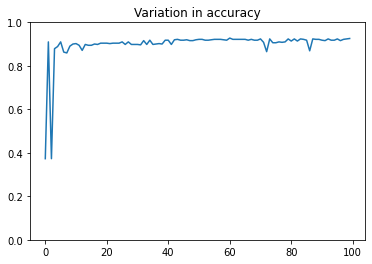

Training Accuracy:  0.927734375
Testing Accuracy:  0.9473684210526315


In [106]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
perceptron = Perceptron()
weight_matrix = perceptron.fit(X_train,Y_train,100,1)


#for last model
y_pred_train = perceptron.predict(X_train)
print('Training Accuracy: ', accuracy_score(y_pred_train,Y_train))

y_pred_test = perceptron.predict(X_test)
print('Testing Accuracy: ',accuracy_score(y_pred_test,Y_test))

In [107]:
%matplotlib inline

In [108]:
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML


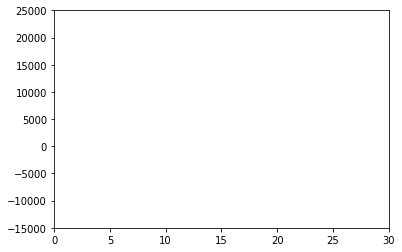

In [109]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
ax.set_xlim(( 0, weight_matrix.shape[1]))
ax.set_ylim((-15000,25000))
line, = ax.plot([], [], lw=2)

In [110]:
# animation function. This is called sequentially
def animate(i):
    x = list(range(weight_matrix.shape[1]))
    y = weight_matrix[i,:]
    line.set_data(x, y)
    return (line,)

In [115]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate,frames=50, interval=50, blit=True)

In [116]:
HTML(anim.to_html5_video())
